<a href="https://colab.research.google.com/github/shivam-kislay/ATMTransaction/blob/master/ShivamKislayAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install Libraries**

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

#try:
  # The %tensorflow_version magic only works in colab.
  # tensorflow_version 2.x
#except Exception:
#  pass
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist

print('TensorFlow version:', tf.__version__)
print('Is Executing Eagerly?', tf.executing_eagerly())

TensorFlow version: 2.2.0-rc2
Is Executing Eagerly? True


## **Dense Layer Models**

**Encoder**

Single Hidden Layer Encoder

In [0]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
    
    def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return self.output_layer(activation)

Two Hidden Layer Encoder

In [0]:
class Encoder_two(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder_two, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units= (intermediate_dim / 2), activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=(intermediate_dim / 2), activation=tf.nn.relu)
    
    def call(self, input_features):
        layer1 = self.hidden_layer(input_features)
        activation = self.hidden_layer2(layer1)
        return self.output_layer(activation)

Three Hidden layer Encoder

In [0]:
class Encoder_three(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder_three, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units= (intermediate_dim / 2), activation=tf.nn.relu)
        self.hidden_layer3 = tf.keras.layers.Dense(units= ((intermediate_dim / 2) / 2), activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units= ((intermediate_dim / 2) / 2), activation=tf.nn.relu)
    
    def call(self, input_features):
        layer1 = self.hidden_layer(input_features)
        layer2 = self.hidden_layer2(layer1)
        activation = self.hidden_layer3(layer2)
        return self.output_layer(activation)

**Decoder**

Single Layer Decoder

In [0]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        activation = self.hidden_layer(code)
        return self.output_layer(activation)

Double Layer Decoder

In [0]:
class Decoder_two(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder_two, self).__init__()
        # self.hidden_layer = tf.keras.layers.Dense(units=(intermediate_dim / 2), activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units= intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        # layer1 = self.hidden_layer(code)
        activation = self.hidden_layer2(code)
        return self.output_layer(activation)

Three layer Decoder

In [0]:
class Decoder_three(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder_three, self).__init__()
        # self.hidden_layer = tf.keras.layers.Dense(units= ((intermediate_dim / 2) / 2), activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units= (intermediate_dim / 2), activation=tf.nn.relu)
        self.hidden_layer3 = tf.keras.layers.Dense(units= intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        #layer1 = self.hidden_layer(code)
        layer2 = self.hidden_layer2(code)
        activation = self.hidden_layer3(layer2)
        return self.output_layer(activation)

**Auto Encoder Model**
Total of 3 dense layer models are made with 1, 2 and 3 hidden layers repectively.

Auto Encoder Model for 1 layer

In [0]:
class Autoencoder(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder, self).__init__()
    self.loss = []
    self.encoder = Encoder(intermediate_dim=intermediate_dim)
    self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

Auto Encoder Model for 2 layers

In [0]:
class Autoencoder_two(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder_two, self).__init__()
    self.loss = []
    self.encoder = Encoder_two(intermediate_dim=intermediate_dim)
    self.decoder = Decoder_two(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

Auto Encoder for 3 layers

In [0]:
class Autoencoder_three(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder_three, self).__init__()
    self.loss = []
    self.encoder = Encoder_three(intermediate_dim=intermediate_dim)
    self.decoder = Decoder_three(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

**Loss Function**

In [0]:
def loss(preds, real):
  return tf.reduce_mean(tf.square(tf.subtract(preds, real)))

**Forward Pass Optimization**

In [0]:
def train(loss, model, opt, original):
  with tf.GradientTape() as tape:
    preds = model(original)
    reconstruction_error = loss(preds, original)
  gradients = tape.gradient(reconstruction_error, model.trainable_variables)
  gradient_variables = zip(gradients, model.trainable_variables)
  opt.apply_gradients(gradient_variables)
  
  return reconstruction_error

**Training Loop**

In [0]:
def train_loop(model, opt, loss, dataset, epochs):
  for epoch in range(epochs):
    epoch_loss = 0
    for step, batch_features in enumerate(dataset):
      loss_values = train(loss, model, opt, batch_features)
      epoch_loss += loss_values
    model.loss.append(epoch_loss)
    print('Epoch {}/{}. Loss: {}'.format(epoch + 1, epochs, epoch_loss.numpy()))

**Process Data Set**

In [14]:
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train / 255.

x_train = x_train.astype(np.float32)
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))

training_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(256)

11493376/11490434 [==============================] - 0s 0us/step


**Train Model**

Model with 1 layer

In [15]:
model = Autoencoder(intermediate_dim=128, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)

train_loop(model, opt, loss, training_dataset, 100)

Epoch 1/100. Loss: 9.325858116149902
Epoch 2/100. Loss: 5.922861099243164
Epoch 3/100. Loss: 5.3952860832214355
Epoch 4/100. Loss: 5.172358989715576
Epoch 5/100. Loss: 4.95595121383667
Epoch 6/100. Loss: 4.840765953063965
Epoch 7/100. Loss: 4.725828170776367
Epoch 8/100. Loss: 4.674190998077393
Epoch 9/100. Loss: 4.6715497970581055
Epoch 10/100. Loss: 4.601112365722656
Epoch 11/100. Loss: 4.598875999450684
Epoch 12/100. Loss: 4.5919270515441895
Epoch 13/100. Loss: 4.55648136138916
Epoch 14/100. Loss: 4.530733585357666
Epoch 15/100. Loss: 4.529290199279785
Epoch 16/100. Loss: 4.509922981262207
Epoch 17/100. Loss: 4.4849982261657715
Epoch 18/100. Loss: 4.477208137512207
Epoch 19/100. Loss: 4.4907660484313965
Epoch 20/100. Loss: 4.477975845336914
Epoch 21/100. Loss: 4.502233028411865
Epoch 22/100. Loss: 4.477233409881592
Epoch 23/100. Loss: 4.449748516082764
Epoch 24/100. Loss: 4.449930191040039
Epoch 25/100. Loss: 4.4615631103515625
Epoch 26/100. Loss: 4.454477310180664
Epoch 27/100. Los

Model With Two Layer

In [16]:
model2 = Autoencoder_two(intermediate_dim=128, original_dim=784)
#print(model2)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)
train_loop(model2, opt, loss, training_dataset, 100)

Epoch 1/100. Loss: 10.106501579284668
Epoch 2/100. Loss: 6.3062262535095215
Epoch 3/100. Loss: 5.554972171783447
Epoch 4/100. Loss: 5.143917083740234
Epoch 5/100. Loss: 4.907423496246338
Epoch 6/100. Loss: 4.738211154937744
Epoch 7/100. Loss: 4.610595703125
Epoch 8/100. Loss: 4.492867469787598
Epoch 9/100. Loss: 4.4215898513793945
Epoch 10/100. Loss: 4.363184452056885
Epoch 11/100. Loss: 4.320153713226318
Epoch 12/100. Loss: 4.26496696472168
Epoch 13/100. Loss: 4.233292102813721
Epoch 14/100. Loss: 4.200211524963379
Epoch 15/100. Loss: 4.199594497680664
Epoch 16/100. Loss: 4.168353080749512
Epoch 17/100. Loss: 4.125350475311279
Epoch 18/100. Loss: 4.1317057609558105
Epoch 19/100. Loss: 4.117483615875244
Epoch 20/100. Loss: 4.111725330352783
Epoch 21/100. Loss: 4.10139274597168
Epoch 22/100. Loss: 4.08391809463501
Epoch 23/100. Loss: 4.068212509155273
Epoch 24/100. Loss: 4.0795745849609375
Epoch 25/100. Loss: 4.082703113555908
Epoch 26/100. Loss: 4.025240898132324
Epoch 27/100. Loss: 4.

Model With three layers

In [17]:
model3 = Autoencoder_three(intermediate_dim=256, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)

train_loop(model3, opt, loss, training_dataset, 100)

Epoch 1/100. Loss: 14.595809936523438
Epoch 2/100. Loss: 7.764787197113037
Epoch 3/100. Loss: 6.717175483703613
Epoch 4/100. Loss: 6.151022911071777
Epoch 5/100. Loss: 5.730539798736572
Epoch 6/100. Loss: 5.508440971374512
Epoch 7/100. Loss: 5.365896224975586
Epoch 8/100. Loss: 5.215963363647461
Epoch 9/100. Loss: 4.951610565185547
Epoch 10/100. Loss: 4.891270637512207
Epoch 11/100. Loss: 4.836716651916504
Epoch 12/100. Loss: 4.730564117431641
Epoch 13/100. Loss: 4.682438850402832
Epoch 14/100. Loss: 4.543855667114258
Epoch 15/100. Loss: 4.548337459564209
Epoch 16/100. Loss: 4.489293575286865
Epoch 17/100. Loss: 4.424539089202881
Epoch 18/100. Loss: 4.373437881469727
Epoch 19/100. Loss: 4.373033046722412
Epoch 20/100. Loss: 4.312856197357178
Epoch 21/100. Loss: 4.280344486236572
Epoch 22/100. Loss: 4.273334980010986
Epoch 23/100. Loss: 4.263602256774902
Epoch 24/100. Loss: 4.208545684814453
Epoch 25/100. Loss: 4.266449451446533
Epoch 26/100. Loss: 4.143404960632324
Epoch 27/100. Loss: 

**Predictions**

Predicton for 1 hidden layer model

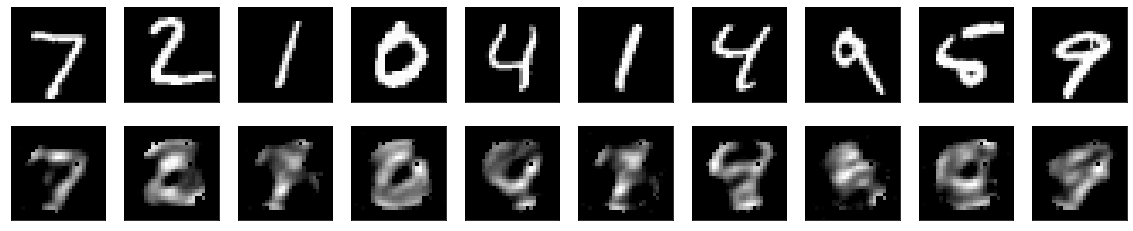

In [18]:
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

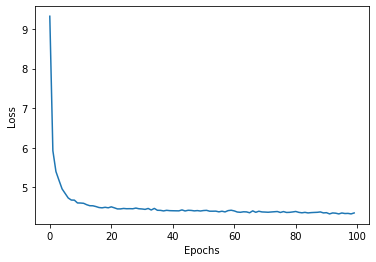

In [26]:
plt.plot(range(100), model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Prediction for 2 hidden layer model

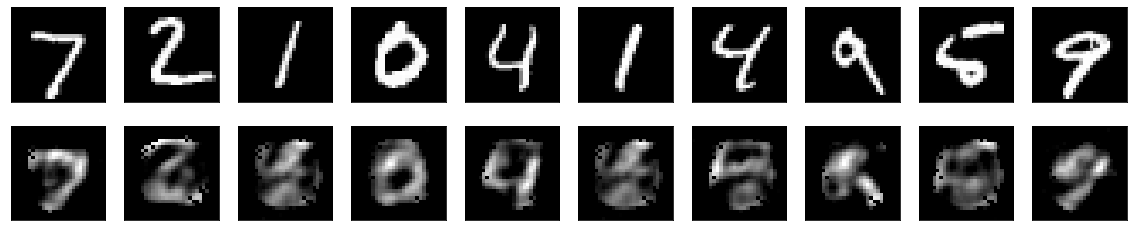

In [19]:
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model2(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

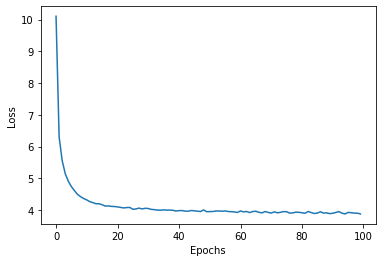

In [28]:
plt.plot(range(100), model2.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Predictions for 3 hidden layer Model

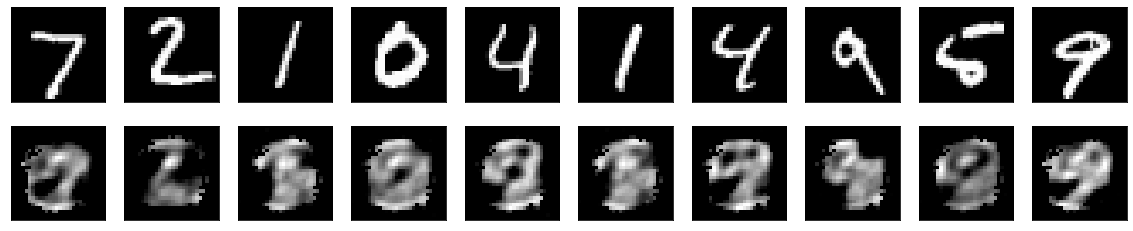

In [20]:
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model3(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

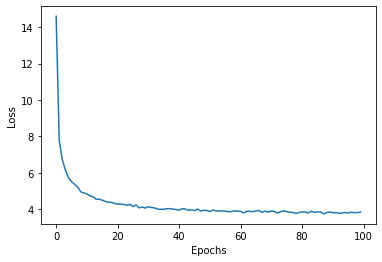

In [29]:
plt.plot(range(100), model3.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

From the Model Loss and Predictions, it can be noticed that the model with 3 hidden layer is performing the best. Since we are reducing the size of the layer. Since the dimensions decrease the data loss while decoding is also more. Thus, accuracy is better for 1 hidden layer model in this case.

## **CNN models**

Prepare Model

In [0]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Prepare Data Set

In [0]:
# to train this model we will with original MNIST digits with shape (samples, 3, 28, 28) and we will just normalize pixel values between 0 and 1
# (x_train, _), (x_test, _) = load_data('../input/mnist.npz')
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

Fit Model

In [24]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/50
469/469 [==============================] - 3s 5ms/step - loss: 0.2192 - val_loss: 0.2196
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.2187 - val_loss: 0.2191
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.2182 - val_loss: 0.2186
Epoch 4/50
469/469 [==============================] - 3s 5ms/step - loss: 0.2177 - val_loss: 0.2181
Epoch 5/50
469/469 [==============================] - 3s 5ms/step - loss: 0.2172 - val_loss: 0.2177
Epoch 6/50
469/469 [==============================] - 3s 5ms/step - loss: 0.2168 - val_loss: 0.2173
Epoch 7/50
469/469 [==============================] - 3s 5ms/step - loss: 0.2164 - val_loss: 0.2168
Epoch 8/50
469/469 [==============================] - 3s 5ms/step - loss: 0.2160 - val_loss: 0.2164
Epoch 9/50
469/469 [==============================] - 3s 5ms/step - loss: 0.2156 - val_loss: 0.2160
Epoch 10/50
469/469 [==============================] - 3s 5ms/step - loss: 0.2152 - val_loss: 0.2156

In [0]:
decoded_imgs = autoencoder.predict(x_test)
autoencoder.load_weights('data/convauto.h5')
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    
    # original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()